In [2]:
import torch
import numpy as np
import torch.nn as nn
from dataloader import *
from model import *
from torch.utils.data.dataloader import *
import torch.optim as optim
from train import *

def set_seed(seed):
    torch.manual_seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    set_model_seed(seed)
    set_train_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 7
set_seed(seed)

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    device = "cuda:0" 
else:
    device = "cpu" 

train_x, train_y, test_x, test_y= read_bci_data()

trainset = BCI_Data(train_x,train_y)
testset = BCI_Data(test_x,test_y)

In [3]:
optimizer = "Adam"
batch = 256
lr = 1e-3
epochs = 400
show_epoch = 10000

In [4]:
EEG_ELU_train, EEG_ELU_test, EEG_ELU_best, EEG_ReLU_train, EEG_ReLU_test, EEG_ReLU_best, EEG_LReLU_train, EEG_LReLU_test, EEG_LReLU_best, DCN_ELU_train, DCN_ELU_test, DCN_ELU_best, DCN_ReLU_train, DCN_ReLU_test, DCN_ReLU_best, DCN_LReLU_train, DCN_LReLU_test, DCN_LReLU_best = train_all(trainset, testset, optimizer = optimizer, batch = batch, device = device, lr = lr, epochs = epochs, show_epoch = show_epoch)

Training EEG_ELU model...


Best Accuracy:  0.8324074074074074  on epoch  270
Training EEG_ReLU model...
Best Accuracy:  0.8740740740740741  on epoch  362
Training EEG_Leaky_ReLU model...
Best Accuracy:  0.8527777777777777  on epoch  265
Training DeepConvNet_ELU model...
Best Accuracy:  0.8185185185185185  on epoch  223
Training DeepConvNet_ReLU model...
Best Accuracy:  0.8101851851851852  on epoch  369
Training DeepConvNet_LeakyReLU model...
Best Accuracy:  0.8240740740740741  on epoch  328


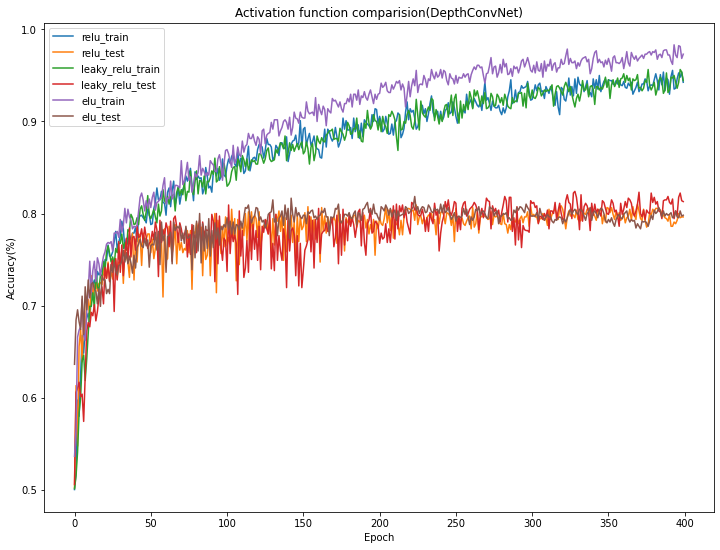

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9)) 
plt.plot(DCN_ReLU_train, label = "relu_train")
plt.plot(DCN_ReLU_test, label = "relu_test")
plt.plot(DCN_LReLU_train, label = "leaky_relu_train")
plt.plot(DCN_LReLU_test, label = "leaky_relu_test")
plt.plot(DCN_ELU_train, label = "elu_train")
plt.plot(DCN_ELU_test, label = "elu_test")
plt.title("Activation function comparision(DepthConvNet)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.legend()
plt.show()

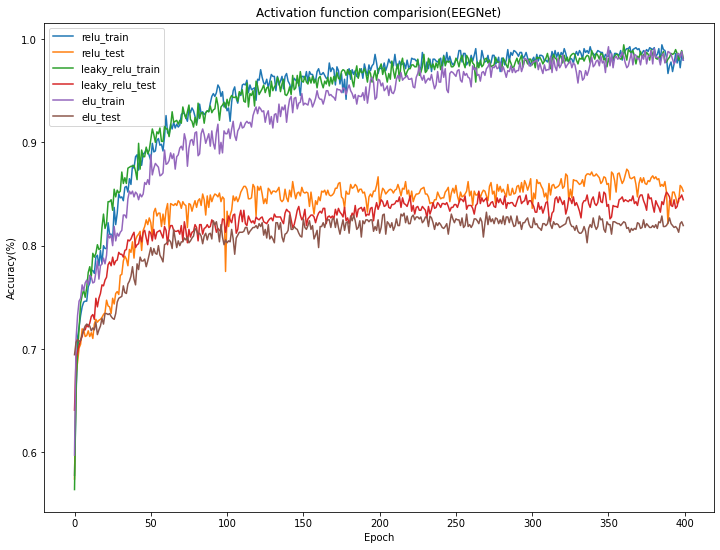

In [6]:
plt.figure(figsize=(12, 9)) 
plt.plot(EEG_ReLU_train, label = "relu_train")
plt.plot(EEG_ReLU_test, label = "relu_test")
plt.plot(EEG_LReLU_train, label = "leaky_relu_train")
plt.plot(EEG_LReLU_test, label = "leaky_relu_test")
plt.plot(EEG_ELU_train, label = "elu_train")
plt.plot(EEG_ELU_test, label = "elu_test")
plt.title("Activation function comparision(EEGNet)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.legend()
plt.show()